**Augmenting the Full Dataset / Data Cleaning & Preprocessing**

In [95]:
import pandas as pd

# Read all CSV files from user_read_only_context
life_expectancy = pd.read_csv("~/110-F25/project/life-expectancy.csv")
gdp_per_capita = pd.read_csv("~/110-F25/project/gdp-per-capita-maddison-project-database.csv")
population_growth = pd.read_csv("~/110-F25/project/population-growth-rates.csv")
fertility_rate = pd.read_csv("~/110-F25/project/children-born-per-woman.csv")

# Start with life expectancy as the base
augmented_data = life_expectancy.copy()

# Merge GDP per capita
augmented_data = augmented_data.merge(
    gdp_per_capita[['Entity', 'Code', 'Year', 'GDP per capita']],
    on=['Entity', 'Code', 'Year'],
    how='outer'
)

# Merge population growth
pop_cols = [col for col in population_growth.columns if col not in ['Entity', 'Code', 'Year']]
augmented_data = augmented_data.merge(
    population_growth[['Entity', 'Code', 'Year'] + pop_cols],
    on=['Entity', 'Code', 'Year'],
    how='outer'
)

# Merge fertility rate
augmented_data = augmented_data.merge(
    fertility_rate[['Entity', 'Code', 'Year', 'Fertility rate (period), historical']],
    on=['Entity', 'Code', 'Year'],
    how='outer'
)

# Rename columns for clarity
augmented_data.rename(columns={
    'Period life expectancy at birth': 'Life Expectancy',
    'GDP per capita': 'GDP Per Capita',
    'Fertility rate (period), historical': 'Fertility Rate',
    'Population growth rate - Sex: all - Age: all - Variant: estimates': 'Pop Growth Rate (Estimates)',
    'Population growth rate - Sex: all - Age: all - Variant: medium': 'Pop Growth Rate (Medium)'
}, inplace=True)

# Combine the two population growth columns - use estimates when available, otherwise use medium
augmented_data['Population Growth Rate'] = augmented_data['Pop Growth Rate (Estimates)'].fillna(
    augmented_data['Pop Growth Rate (Medium)']
)

# Drop the original columns
augmented_data.drop(columns=['Pop Growth Rate (Estimates)', 'Pop Growth Rate (Medium)', 'Code'], inplace=True)

# Drop missing values
augmented_data = augmented_data.dropna()

# Sort by Entity and Year
augmented_data = augmented_data.sort_values(['Entity', 'Year']).reset_index(drop=True)

print("Augmented dataset shape:", augmented_data.shape)
print("Augmented dataset columns:", augmented_data.columns.tolist())

# Save the augmented dataset
output_path = "augmented_dataset.csv"
augmented_data.to_csv(output_path, index=False)
print(f"\n Augmented dataset saved to {output_path}")

# Preview the Dataset
print("\nDataset Preview:")
augmented_data.head(5)

Augmented dataset shape: (11545, 6)
Augmented dataset columns: ['Entity', 'Year', 'Life Expectancy', 'GDP Per Capita', 'Fertility Rate', 'Population Growth Rate']

 Augmented dataset saved to augmented_dataset.csv

Dataset Preview:


,Entity,Year,Life Expectancy,GDP Per Capita,Fertility Rate,Population Growth Rate
0,Afghanistan,1950,28.1563,1156.0,7.248,1.275
1,Afghanistan,1951,28.5836,1170.0,7.260,1.360
2,Afghanistan,1952,29.0138,1189.0,7.260,1.374
3,Afghanistan,1953,29.4521,1240.0,7.266,1.335
4,Afghanistan,1954,29.6975,1245.0,7.254,1.394


**Data Visualization**

In [96]:
# Import different libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Fertility Rate vs Population Growth Rate')

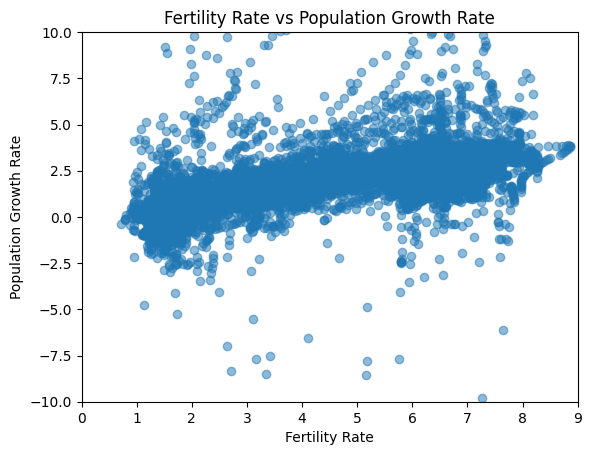

In [97]:
# Scatter plot: Fertility Rate vs Population Growth
x = augmented_data['Fertility Rate'].values
y = augmented_data['Population Growth Rate'].values
plt.scatter(x,y,alpha=0.5)   
plt.xlim(0, 9)  
plt.ylim(-10, 10)
plt.xlabel("Fertility Rate")
plt.ylabel("Population Growth Rate")
plt.title("Fertility Rate vs Population Growth Rate")

Text(0.5, 1.0, 'GDP Per Capita vs Population Growth Rate')

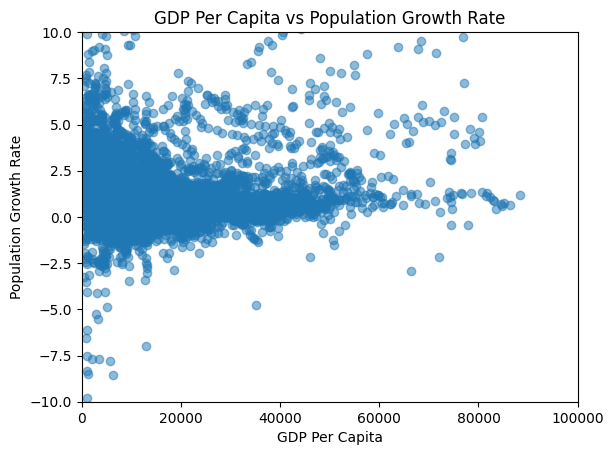

In [98]:
# Scatter plot: GDP Per Capita vs Population Growth
x = augmented_data['GDP Per Capita'].values
y = augmented_data['Population Growth Rate'].values
plt.scatter(x,y,alpha=0.5)
plt.xlim(0, 100000)
plt.ylim(-10, 10)
plt.xlabel("GDP Per Capita")
plt.ylabel("Population Growth Rate")
plt.title("GDP Per Capita vs Population Growth Rate")

Text(0.5, 1.0, 'Life Expectancy vs Population Growth Rate')

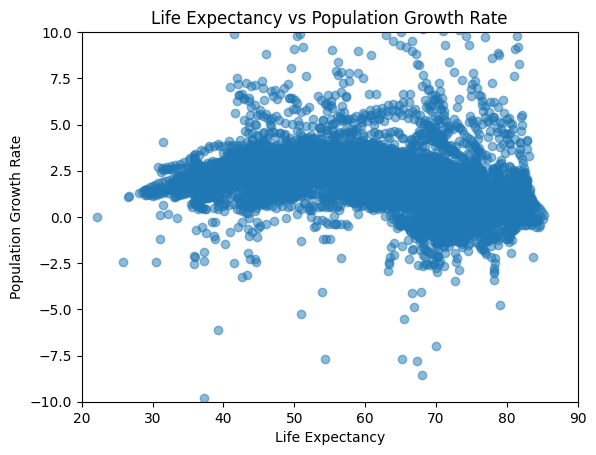

In [99]:
# Scatter plot: Life Expectancy vs Population Growth
x = augmented_data['Life Expectancy'].values
y = augmented_data['Population Growth Rate'].values
plt.scatter(x,y,alpha=0.5)
plt.xlim(20, 90)
plt.ylim(-10, 10)
plt.xlabel("Life Expectancy")
plt.ylabel("Population Growth Rate")
plt.title("Life Expectancy vs Population Growth Rate")

Text(0.5, 1.0, 'GDP Per Capita vs Life Expectancy')

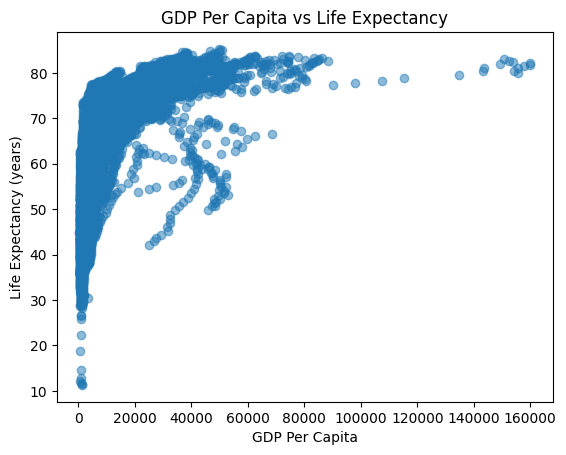

In [100]:
# Scatter plot: GDP Per Capita vs Life Expectancy
x = augmented_data['GDP Per Capita'].values
y = augmented_data['Life Expectancy'].values
plt.scatter(x, y, alpha=0.5)
plt.xlabel("GDP Per Capita")
plt.ylabel("Life Expectancy (years)")
plt.title("GDP Per Capita vs Life Expectancy")

Text(0.5, 1.0, 'GDP Per Capita vs Fertility Rate')

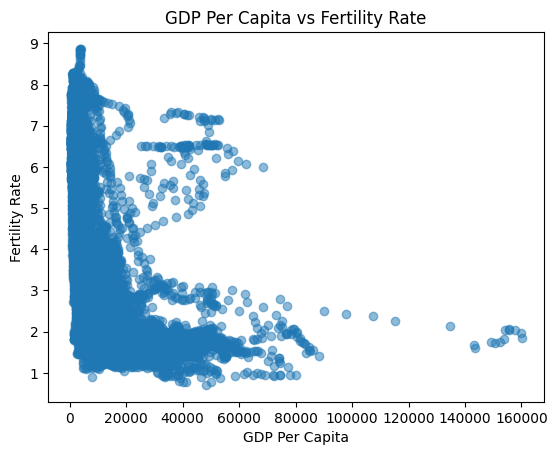

In [101]:
# Scatter plot: GDP Per Capita vs Fertility Rate
x = augmented_data['GDP Per Capita'].values
y = augmented_data['Fertility Rate'].values
plt.scatter(x, y, alpha=0.5)
plt.xlabel("GDP Per Capita")
plt.ylabel("Fertility Rate")
plt.title("GDP Per Capita vs Fertility Rate")

Text(0.5, 1.0, 'Life Expectancy vs Fertility Rate')

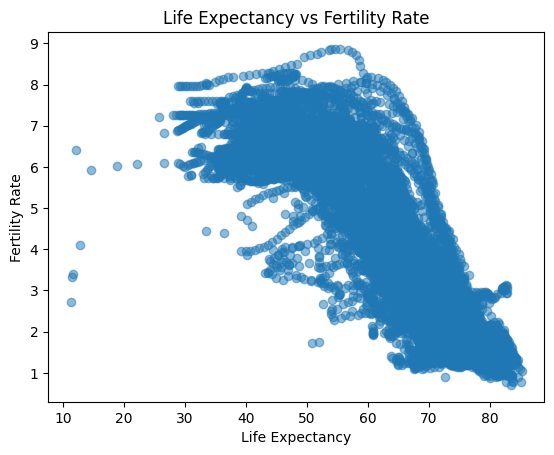

In [102]:
# Scatter plot: Life Expectancy vs Fertility Rate
x = augmented_data['Life Expectancy'].values
y = augmented_data['Fertility Rate'].values
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Life Expectancy")
plt.ylabel("Fertility Rate")
plt.title("Life Expectancy vs Fertility Rate")

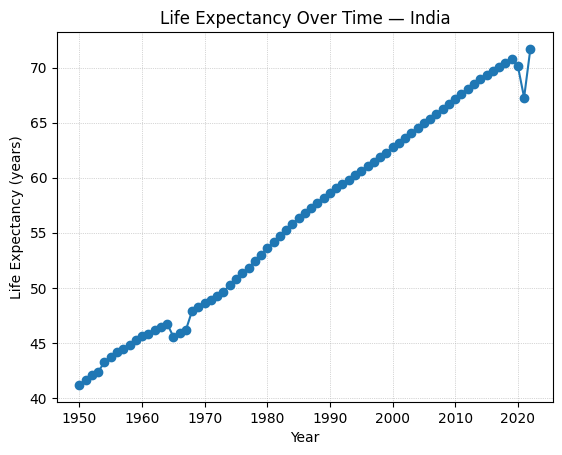

In [108]:
# Time-series line: Life Expectancy over time for a chosen country
country = "India"
if country not in augmented_data['Entity'].unique():
    country = augmented_data['Entity'].unique()[0]
country_df = augmented_data[augmented_data['Entity'] == country].sort_values("Year")
plt.plot(country_df['Year'], country_df['Life Expectancy'], marker='o')
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.title(f"Life Expectancy Over Time — {country}")
plt.grid(True, linestyle=':', linewidth=0.5)

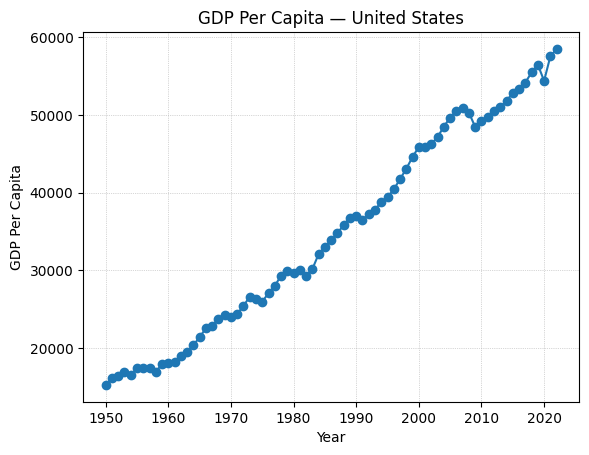

In [109]:
# Time-series line: GDP Per Capita for a chosen country
country = "United States"
if country not in augmented_data['Entity'].unique():
    country = augmented_data['Entity'].unique()[0]
country_df = augmented_data[augmented_data['Entity'] == country].sort_values("Year")
plt.plot(country_df['Year'], country_df['GDP Per Capita'], marker='o')
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.title(f"GDP Per Capita — {country}")
plt.grid(True, linestyle=':', linewidth=0.5)

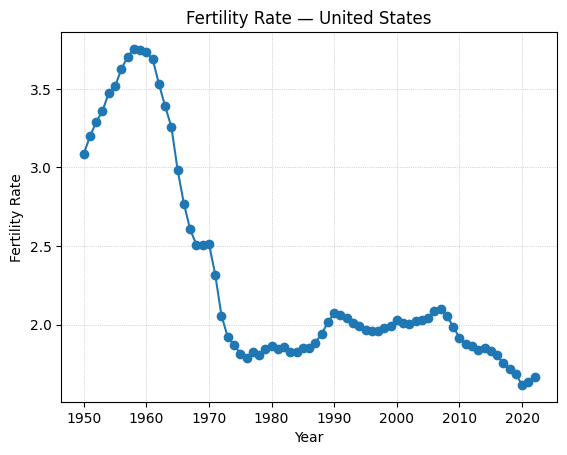

In [110]:
# Time-series line: Fertility Rate for a chosen country
country = "United States"
if country not in augmented_data['Entity'].unique():
    country = augmented_data['Entity'].unique()[0]
country_df = augmented_data[augmented_data['Entity'] == country].sort_values("Year")
plt.plot(country_df['Year'], country_df['Fertility Rate'], marker='o')
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.title(f"Fertility Rate — {country}")
plt.grid(True, linestyle=':', linewidth=0.5)

Text(0.5, 1.0, 'Distribution of Fertility Rates')

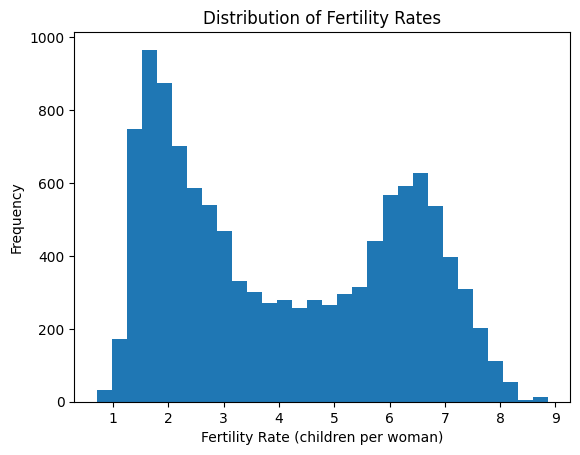

In [111]:
# Histogram: Fertility Rate distribution
plt.hist(augmented_data['Fertility Rate'].dropna(), bins=30)
plt.xlabel("Fertility Rate (children per woman)")
plt.ylabel("Frequency")
plt.title("Distribution of Fertility Rates")

Text(0.5, 1.0, 'Distribution of Life Expectancy')

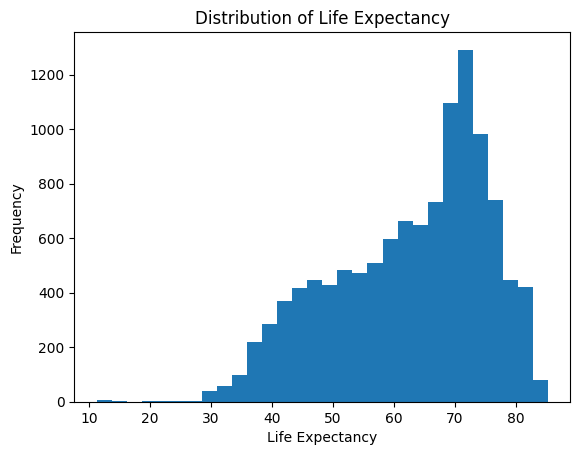

In [112]:
# Histogram: Life Expectancy distribution
plt.hist(augmented_data['Life Expectancy'].dropna(), bins=30)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")

Text(0.5, 1.0, 'Distribution of GDP Per Capita')

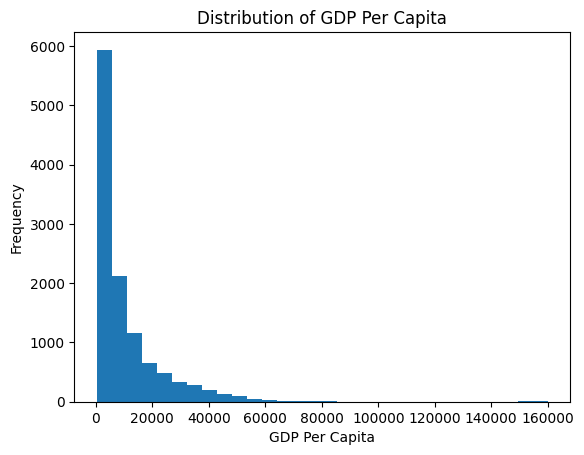

In [113]:
# Histogram: GDP Per Capita distribution
plt.hist(augmented_data['GDP Per Capita'].dropna(), bins=30)
plt.xlabel("GDP Per Capita")
plt.ylabel("Frequency")
plt.title("Distribution of GDP Per Capita")

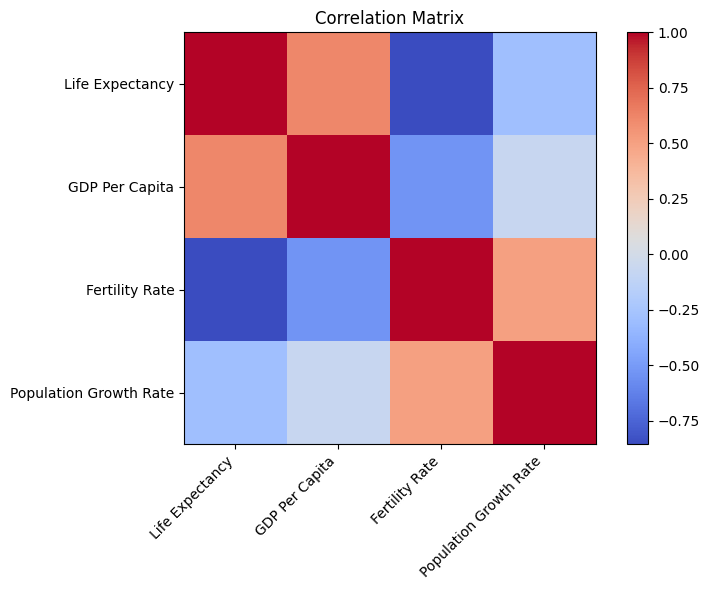

In [114]:
# Heatmap Correlation of Each Feature
cols = ["Life Expectancy", "GDP Per Capita", "Fertility Rate", "Population Growth Rate"]
data = df[cols]

corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

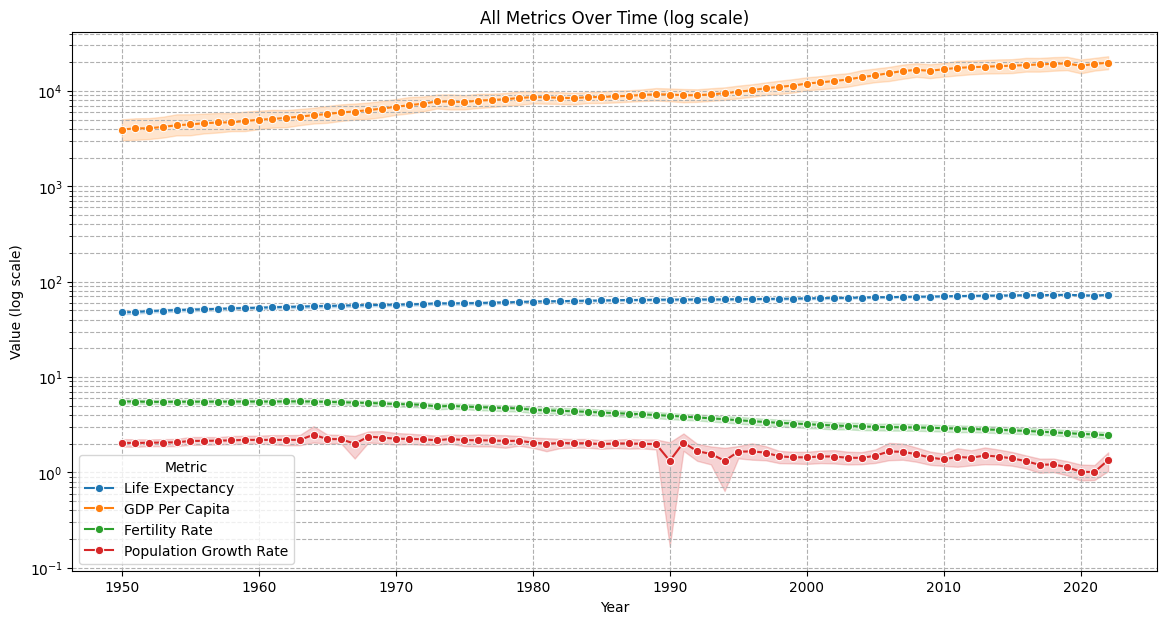

In [115]:
# All Metrics Over Time (Log Scale Trends)
df_no_entity = augmented_data.loc[:, ~augmented_data.columns.isin(["Entity"])]
df_melt = df_no_entity.melt(
    id_vars=["Year"],
    var_name="Metric",
    value_name="Value"
)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melt, x="Year", y="Value", hue="Metric", marker="o")

plt.yscale("log")

plt.title("All Metrics Over Time (log scale)")
plt.xlabel("Year")
plt.ylabel("Value (log scale)")
plt.grid(True, which="both", ls="--")
plt.legend(title="Metric")

plt.show()

**Prediction Model**

In [116]:
# Import Libraries Needed
import pandas as pd
import seaborn as sns

# Drop Categorical Collumns
augmented_data = augmented_data.drop(columns='Entity')

# Observe The Correlation
augmented_data.corr()

,Year,Life Expectancy,GDP Per Capita,Fertility Rate,Population Growth Rate
Year,1.000000,0.555774,0.352185,-0.511172,-0.173716
Life Expectancy,0.555774,1.000000,0.612095,-0.856853,-0.287674
GDP Per Capita,0.352185,0.612095,1.000000,-0.535778,-0.070669
Fertility Rate,-0.511172,-0.856853,-0.535778,1.000000,0.500539
Population Growth Rate,-0.173716,-0.287674,-0.070669,0.500539,1.000000


In [117]:
# Define X and Y
y = augmented_data["Population Growth Rate"]
X = augmented_data.drop(columns=["Population Growth Rate"])

# Define Regression Function
def augmented_data_lr(X, y, seed=0):
    # Split X and y into X_train, X_test and y_train, y_test
    # using the same seed ensures that the same rows are picked between X and y
    
    X_train = X.sample(frac=0.8, random_state=seed)
    X_test = X.drop(index=X_train.index) 
    
    y_train = y.sample(frac=0.8, random_state=seed)
    y_test = y.drop(index=y_train.index)
    
    # Create "empty" model
    from sklearn.linear_model import LinearRegression
    
    lr = LinearRegression(fit_intercept=True)
    
    # Fit model to data (or train model)
    lr.fit(X_train, y_train)
    
    # Save coefficients of the trained model
    coefs = pd.DataFrame(lr.coef_, 
                         index=lr.feature_names_in_, 
                         columns=['Coefficient vals'])
    
    # Save model performance on train and test
    coefs.loc['Train R2 score'] = lr.score(X_train, y_train)
    coefs.loc['Test R2 score'] = lr.score(X_test, y_test)
    
    return coefs

In [118]:
# Observe Summary Statistics
X.describe()

,Year,Life Expectancy,GDP Per Capita,Fertility Rate
count,11545.000000,11545.000000,11545.000000,11545.000000
mean,1986.981897,62.730708,10431.922325,4.100687
std,20.942012,12.542184,13350.938575,2.088545
min,1950.000000,11.295200,377.580080,0.708000
25%,1969.000000,53.421700,1949.000000,2.097000
50%,1988.000000,65.609000,5367.795000,3.747000
75%,2005.000000,72.477100,13238.000000,6.126000
max,2022.000000,85.263200,160051.230000,8.864000


In [119]:
# Standardize
X_standardized = X - X.mean() # Subtract by column mean
X_standardized = X_standardized/X_standardized.std() # Divide by column std

X_standardized.describe()

,Year,Life Expectancy,GDP Per Capita,Fertility Rate
count,1.154500e+04,1.154500e+04,11545.000000,1.154500e+04
mean,3.531788e-15,-6.745386e-16,0.000000,-4.923640e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.765919e+00,-4.101001e+00,-0.753081,-1.624426e+00
25%,-8.586518e-01,-7.422158e-01,-0.635380,-9.593701e-01
50%,4.861534e-02,2.294889e-01,-0.379309,-1.693463e-01
75%,8.603807e-01,7.770889e-01,0.210178,9.697244e-01
max,1.672146e+00,1.796537e+00,11.206651,2.280685e+00


In [120]:
# Min Max Scaling
X_minmax = X - X.min() # this turns minimum value of each column to 0
ranges = X.max() - X.min() # calculate the range per column
X_minmax = X_minmax/ranges # this turns maximum value to 1

X_minmax.describe()

,Year,Life Expectancy,GDP Per Capita,Fertility Rate
count,11545.000000,11545.000000,11545.000000,11545.000000
mean,0.513637,0.695375,0.062968,0.415974
std,0.290861,0.169562,0.083614,0.256075
min,0.000000,0.000000,0.000000,0.000000
25%,0.263889,0.569523,0.009841,0.170304
50%,0.527778,0.734288,0.031253,0.372609
75%,0.763889,0.827140,0.080542,0.664296
max,1.000000,1.000000,1.000000,1.000000


In [121]:
# Results
seed = 2024

results = pd.DataFrame()
for features, name in zip([X, X_standardized, X_minmax], 
                    ["Unnormalized", "Standardized", "Min-max scaled"]):
    res = augmented_data_lr(features, y, seed)
    res = res.rename(columns ={'Coefficient vals': name})
    results = pd.concat((results, res), axis=1)

results['Unnormalized * std'] = results['Unnormalized']*X.std()
results

,Unnormalized,Standardized,Min-max scaled,Unnormalized * std
Year,0.003204,0.067102,0.230701,0.067102
Life Expectancy,0.059688,0.748615,4.414987,0.748615
GDP Per Capita,0.000029,0.381295,4.560189,0.381295
Fertility Rate,0.879469,1.836809,7.172946,1.836809
Train R2 score,0.332690,0.332690,0.332690,NaN
Test R2 score,0.412157,0.412157,0.412157,NaN


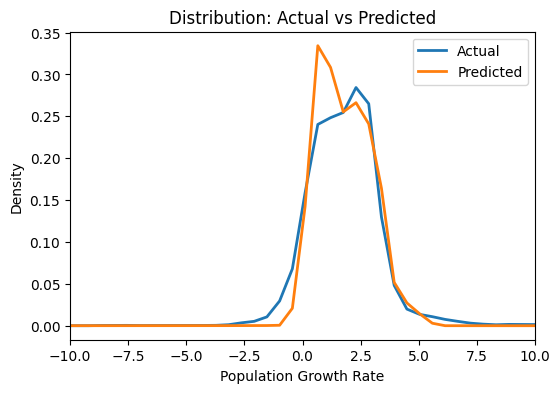

In [122]:
# Compare predicted vs actual distributions
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Fit model
lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)
resid = y - y_pred

# Compute KDEs
kde_actual = stats.gaussian_kde(y)
kde_pred = stats.gaussian_kde(y_pred)

x_range = np.linspace(min(min(y), min(y_pred)), max(max(y), max(y_pred)), 200)

plt.figure(figsize=(6,4))
plt.plot(x_range, kde_actual(x_range), label='Actual', linewidth=2)
plt.plot(x_range, kde_pred(x_range), label='Predicted', linewidth=2)
plt.xlim(-10, 10)
plt.xlabel('Population Growth Rate')  
plt.ylabel('Density') 
plt.legend()
plt.title('Distribution: Actual vs Predicted')
plt.show()

In [123]:
# Predict new information
new_input_df = pd.DataFrame([[1993, 76.83, 14840, 1.96]], columns=X.columns) # [Year, Life Expectancy, GDP Per Capita, Fertility Rate]
predicted_pop_growth = lr.predict(new_input_df)
print("Predicted population growth rate:", predicted_pop_growth[0])

Predicted population growth rate: 0.9200740853163918
